# Predicting the Presence of Lung Cancer

# Problem Definition
> How well can we predict whether there is lung cancer

We'll try to get an accuracy of over 95%, since this is important

# Data

The data is taken from kaggle: https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
lung_data = pd.read_csv('data.csv')
lung_data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
lung_data.shape

(309, 16)

In [5]:
lung_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

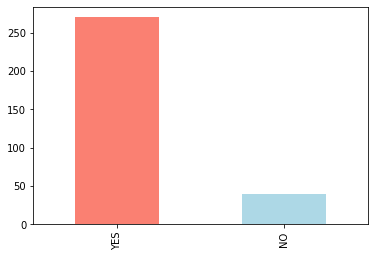

In [10]:
# Check for data imbalance
lung_data['LUNG_CANCER'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

Data is quite imbalanced: therefore we will sample the 'NO' diagnosis

In [16]:
lung_data[lung_data['LUNG_CANCER'] == 'YES'].shape[0]

270

In [17]:
# Upsample minority class
no_upsampled = resample(
    lung_data[lung_data['LUNG_CANCER'] == 'NO'], 
    replace=True,
    n_samples=lung_data[lung_data['LUNG_CANCER'] == 'YES'].shape[0],
    random_state=123
)

In [19]:
no_upsampled.shape

(270, 16)

In [20]:
# Create balanced dataset
lung_data_sampled = pd.concat([lung_data[lung_data['LUNG_CANCER'] == 'YES'], no_upsampled])

In [21]:
lung_data_sampled.shape

(540, 16)

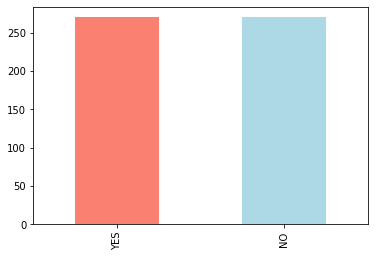

In [23]:
# Check for data imbalance
lung_data_sampled['LUNG_CANCER'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);